# Make By 陳柏諭

##  使用套件

In [1552]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
import seaborn as sns

from sklearn.metrics import mean_squared_error
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight

## 租屋比價王-西屯(75% 訓練 25% 測試)

In [1553]:
train_data=pd.read_csv("Rent.csv",index_col=False)
train_data

,Unnamed: 0,住址,行政區,物件說明,面積,房,衛,廳,物件類型,物件位於幾樓,物件共幾樓,管理費用,租金
0,0,台中市西屯區西屯路二段32巷,西屯區,💜全新裝潢♧首月租金半價♧好停車～💛,13.00,1,1,0,獨立套房,3,6,"1,000元/月",13999
1,1,台中市西屯區順和七街,西屯區,馬上看房丨陽台獨洗曬丨電梯丨全新,12.68,1,1,0,獨立套房,3,7,"1,000元/月",8999
2,2,台中市西屯區福上巷,西屯區,🔥社會住宅/家具齊全/附近好停/免仲,34.00,3,2,2,整層住家,6,14,"2,000元/月",22000
3,3,台中市西屯區至善路,西屯區,短租新光大遠百邊間舒適房/年租洽談,10.54,1,1,0,住宅,4,7,NaN,12000
4,4,台中市西屯區河南路二段,西屯區,🌈全新質感屋✅電梯✅流理臺✅超大衣櫃,12.00,1,1,0,獨立套房,3,8,"1,200元/月",10300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,3975,台中市西屯區漢口路二段,西屯區,漢口路餐飲戰區店面,20.00,0,0,0,店面,1,4,NaN,32000
3976,3976,台中市西屯區惠來路三段,西屯區,裝潢大三房★含車位★採光通風★地點優爆,38.00,3,2,2,整層住家,4,14,"3,320元/月",36000
3977,3977,台中市西屯區寶慶街,西屯區,台水電~電梯~2房1廳~可開伙~陽台獨洗,22.00,2,1,1,整層住家,6,12,"1,210元/月",11999
3978,3978,台中市西屯區文心路二段566號,西屯區,市政LV3房2廳2衛屋主自租,22.00,3,2,2,整層住家,16,23,"2,791元/月",23000


## 租屋比價王-南屯

In [1554]:
test_data=pd.read_csv("South_Rent.csv",index_col=False)
test_data

,Unnamed: 0,住址,行政區,物件說明,面積,房,衛,廳,物件類型,物件位於幾樓,物件共幾樓,管理費用,租金
0,0,台中市南屯區保安五街17號,南屯區,💗租｜南屯嶺東｜2房2衛｜平面車位,16.0,2.0,2.0,2.0,整層住家,8,12,NaN,26000.0
1,1,台中市南屯區東興路二段,南屯區,三改二大空間❤️兩間更衣室❤️可寵,25.0,2.0,1.0,2.0,整層住家,5,14,"1,525元/月",28000.0
2,2,台中市南屯區忠勇路,南屯區,電梯可貓百萬採光室內機車位可報稅,10.0,NaN,NaN,NaN,車位,7,7,NaN,13000.0
3,3,台中市南屯區保安十街,南屯區,近嶺東科大精科全新套房獨陽獨洗曬,10.0,1.0,1.0,0.0,獨立套房,2,5,無,11500.0
4,4,台中市南屯區東興西街9號,南屯區,南屯好市多商圈。兩房一廳,12.0,1.0,1.0,0.0,獨立套房,7,12,"1,300元/月",18000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,台中市南屯區保安十街,南屯區,嶺東精科全新❤️陽台獨洗乾濕分離❤️可報稅租補戶籍,10.0,1.0,1.0,NaN,住宅,4,5,1001,9999.0
3996,3996,台中市南屯區文心路一段214號,南屯區,財屋近捷運文心森林公園2+1房,31.0,2.0,2.0,1.0,整層住家,7,22,"2,200元/月",21000.0
3997,3997,台中市南屯區嶺東南路,南屯區,質感大3房💖家具電全配💖全新完工,33.0,3.0,2.0,2.0,整層住家,3,13,"2,000元/月",29000.0
3998,3998,台中市南屯區嶺東南路,南屯區,全新裝潢大三房🔆傢俱電全配~含平面車位,33.0,3.0,2.0,1.0,整層住家,3,15,NaN,29999.0


In [1555]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3980 non-null   int64  
 1   住址          3980 non-null   object 
 2   行政區         3980 non-null   object 
 3   物件說明        3980 non-null   object 
 4   面積          3980 non-null   float64
 5   房           3980 non-null   int64  
 6   衛           3980 non-null   int64  
 7   廳           3980 non-null   int64  
 8   物件類型        3980 non-null   object 
 9   物件位於幾樓      3980 non-null   int64  
 10  物件共幾樓       3980 non-null   int64  
 11  管理費用        2869 non-null   object 
 12  租金          3980 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 404.3+ KB


In [1556]:
data=train_data.drop(["住址","Unnamed: 0","行政區","物件說明"],axis=1)
test_data=test_data.drop(["住址","Unnamed: 0","行政區","物件說明"],axis=1)
# data
test_data

,面積,房,衛,廳,物件類型,物件位於幾樓,物件共幾樓,管理費用,租金
0,16.0,2.0,2.0,2.0,整層住家,8,12,NaN,26000.0
1,25.0,2.0,1.0,2.0,整層住家,5,14,"1,525元/月",28000.0
2,10.0,NaN,NaN,NaN,車位,7,7,NaN,13000.0
3,10.0,1.0,1.0,0.0,獨立套房,2,5,無,11500.0
4,12.0,1.0,1.0,0.0,獨立套房,7,12,"1,300元/月",18000.0
...,...,...,...,...,...,...,...,...,...
3995,10.0,1.0,1.0,NaN,住宅,4,5,1001,9999.0
3996,31.0,2.0,2.0,1.0,整層住家,7,22,"2,200元/月",21000.0
3997,33.0,3.0,2.0,2.0,整層住家,3,13,"2,000元/月",29000.0
3998,33.0,3.0,2.0,1.0,整層住家,3,15,NaN,29999.0


In [1557]:
data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   面積      3980 non-null   float64
 1   房       3980 non-null   int64  
 2   衛       3980 non-null   int64  
 3   廳       3980 non-null   int64  
 4   物件類型    3980 non-null   object 
 5   物件位於幾樓  3980 non-null   int64  
 6   物件共幾樓   3980 non-null   int64  
 7   管理費用    2869 non-null   object 
 8   租金      3980 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 280.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   面積      4000 non-null   float64
 1   房       3400 non-null   float64
 2   衛       3400 non-null   float64
 3   廳       3200 non-null   float64
 4   物件類型    4000 non-null   object 
 5   物件位於幾樓  4000 non-null   int64  
 6   物件共幾樓   4000 non

In [1558]:
data.fillna(value = '0元/月', inplace = True)
test_data['管理費用'].fillna(value = '0元/月', inplace = True)

In [1559]:
data['管理費用'] =  data['管理費用'].apply(lambda x : x.split('元')[0])
data['管理費用'] =  data['管理費用'].apply(lambda x : x.replace(',',''))
data['管理費用'] =  data['管理費用'].apply(lambda x : x.replace('$',''))


test_data['管理費用'] =  test_data['管理費用'].apply(lambda x : x.split('元')[0])
test_data['管理費用'] =  test_data['管理費用'].apply(lambda x : x.replace(',',''))
test_data['管理費用'] =  test_data['管理費用'].apply(lambda x : x.replace('$',''))
test_data['管理費用'] =  test_data['管理費用'].apply(lambda x : x.replace('無','0'))

In [1560]:
# data.info()
test_data['廳']=test_data['廳'].astype(str)
test_data['管理費用']=test_data['管理費用'].astype(str)

In [1561]:
arr=[]
for i in range(4000):
    if test_data.廳[i]=="nan":
         arr.append(i)
# print(arr)
test_data=test_data.drop(index=arr,axis=0)
test_data['廳']=test_data['廳'].astype(np.float64)
test_data['管理費用']=test_data['管理費用'].astype(np.float64)
# test_data.index[2]
sout_rent_money=[]


In [1562]:
for i in test_data['租金']:
#     print(i)
    sout_rent_money.append(i)

In [1563]:
test_data=test_data.drop('租金',axis=1)
test_data

,面積,房,衛,廳,物件類型,物件位於幾樓,物件共幾樓,管理費用
0,16.0,2.0,2.0,2.0,整層住家,8,12,0.0
1,25.0,2.0,1.0,2.0,整層住家,5,14,1525.0
3,10.0,1.0,1.0,0.0,獨立套房,2,5,0.0
4,12.0,1.0,1.0,0.0,獨立套房,7,12,1300.0
5,85.0,0.0,0.0,0.0,店面,1,2,0.0
...,...,...,...,...,...,...,...,...
3994,5.0,1.0,1.0,0.0,獨立套房,7,14,0.0
3996,31.0,2.0,2.0,1.0,整層住家,7,22,2200.0
3997,33.0,3.0,2.0,2.0,整層住家,3,13,2000.0
3998,33.0,3.0,2.0,1.0,整層住家,3,15,0.0


In [1564]:
data["管理費用"]=data["管理費用"].astype(np.int64)

In [1565]:
data.describe()

,面積,房,衛,廳,物件位於幾樓,物件共幾樓,管理費用,租金
count,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000
mean,24.790241,1.700000,1.200000,0.864573,5.554020,11.097739,1379.190704,21918.684673
std,18.036337,1.100138,0.600075,0.904042,4.622176,6.767621,1651.850948,13929.436529
min,10.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6000.000000
25%,12.680000,1.000000,1.000000,0.000000,3.000000,6.000000,0.000000,10999.750000
50%,20.000000,1.000000,1.000000,1.000000,4.000000,8.000000,1000.000000,21000.000000
75%,31.000000,3.000000,2.000000,2.000000,6.000000,15.250000,2000.000000,30500.000000
max,82.000000,4.000000,2.000000,2.000000,18.000000,24.000000,7000.000000,65000.000000


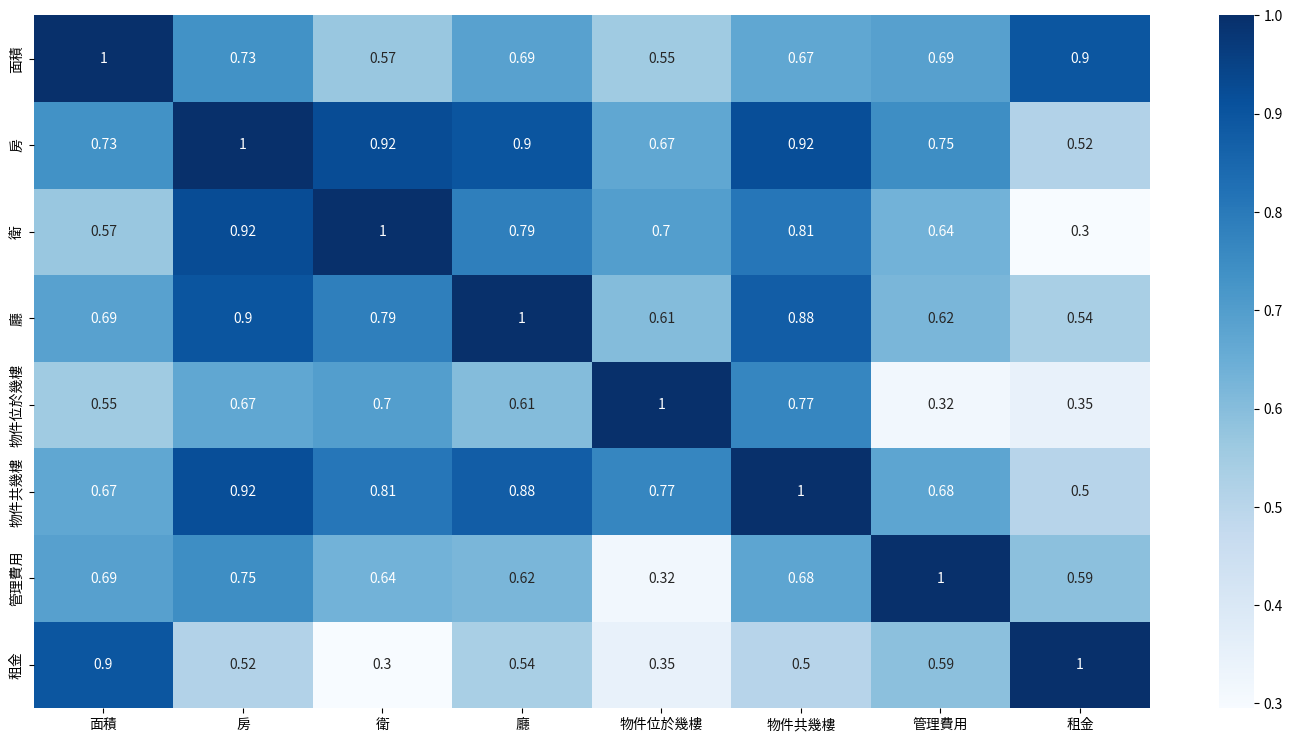

In [1566]:
plt.figure(figsize=(18,9))
fig=sns.heatmap(data.corr(),annot=True,cmap='Blues')
fig = plt.gcf()
fig.savefig('heatmap')

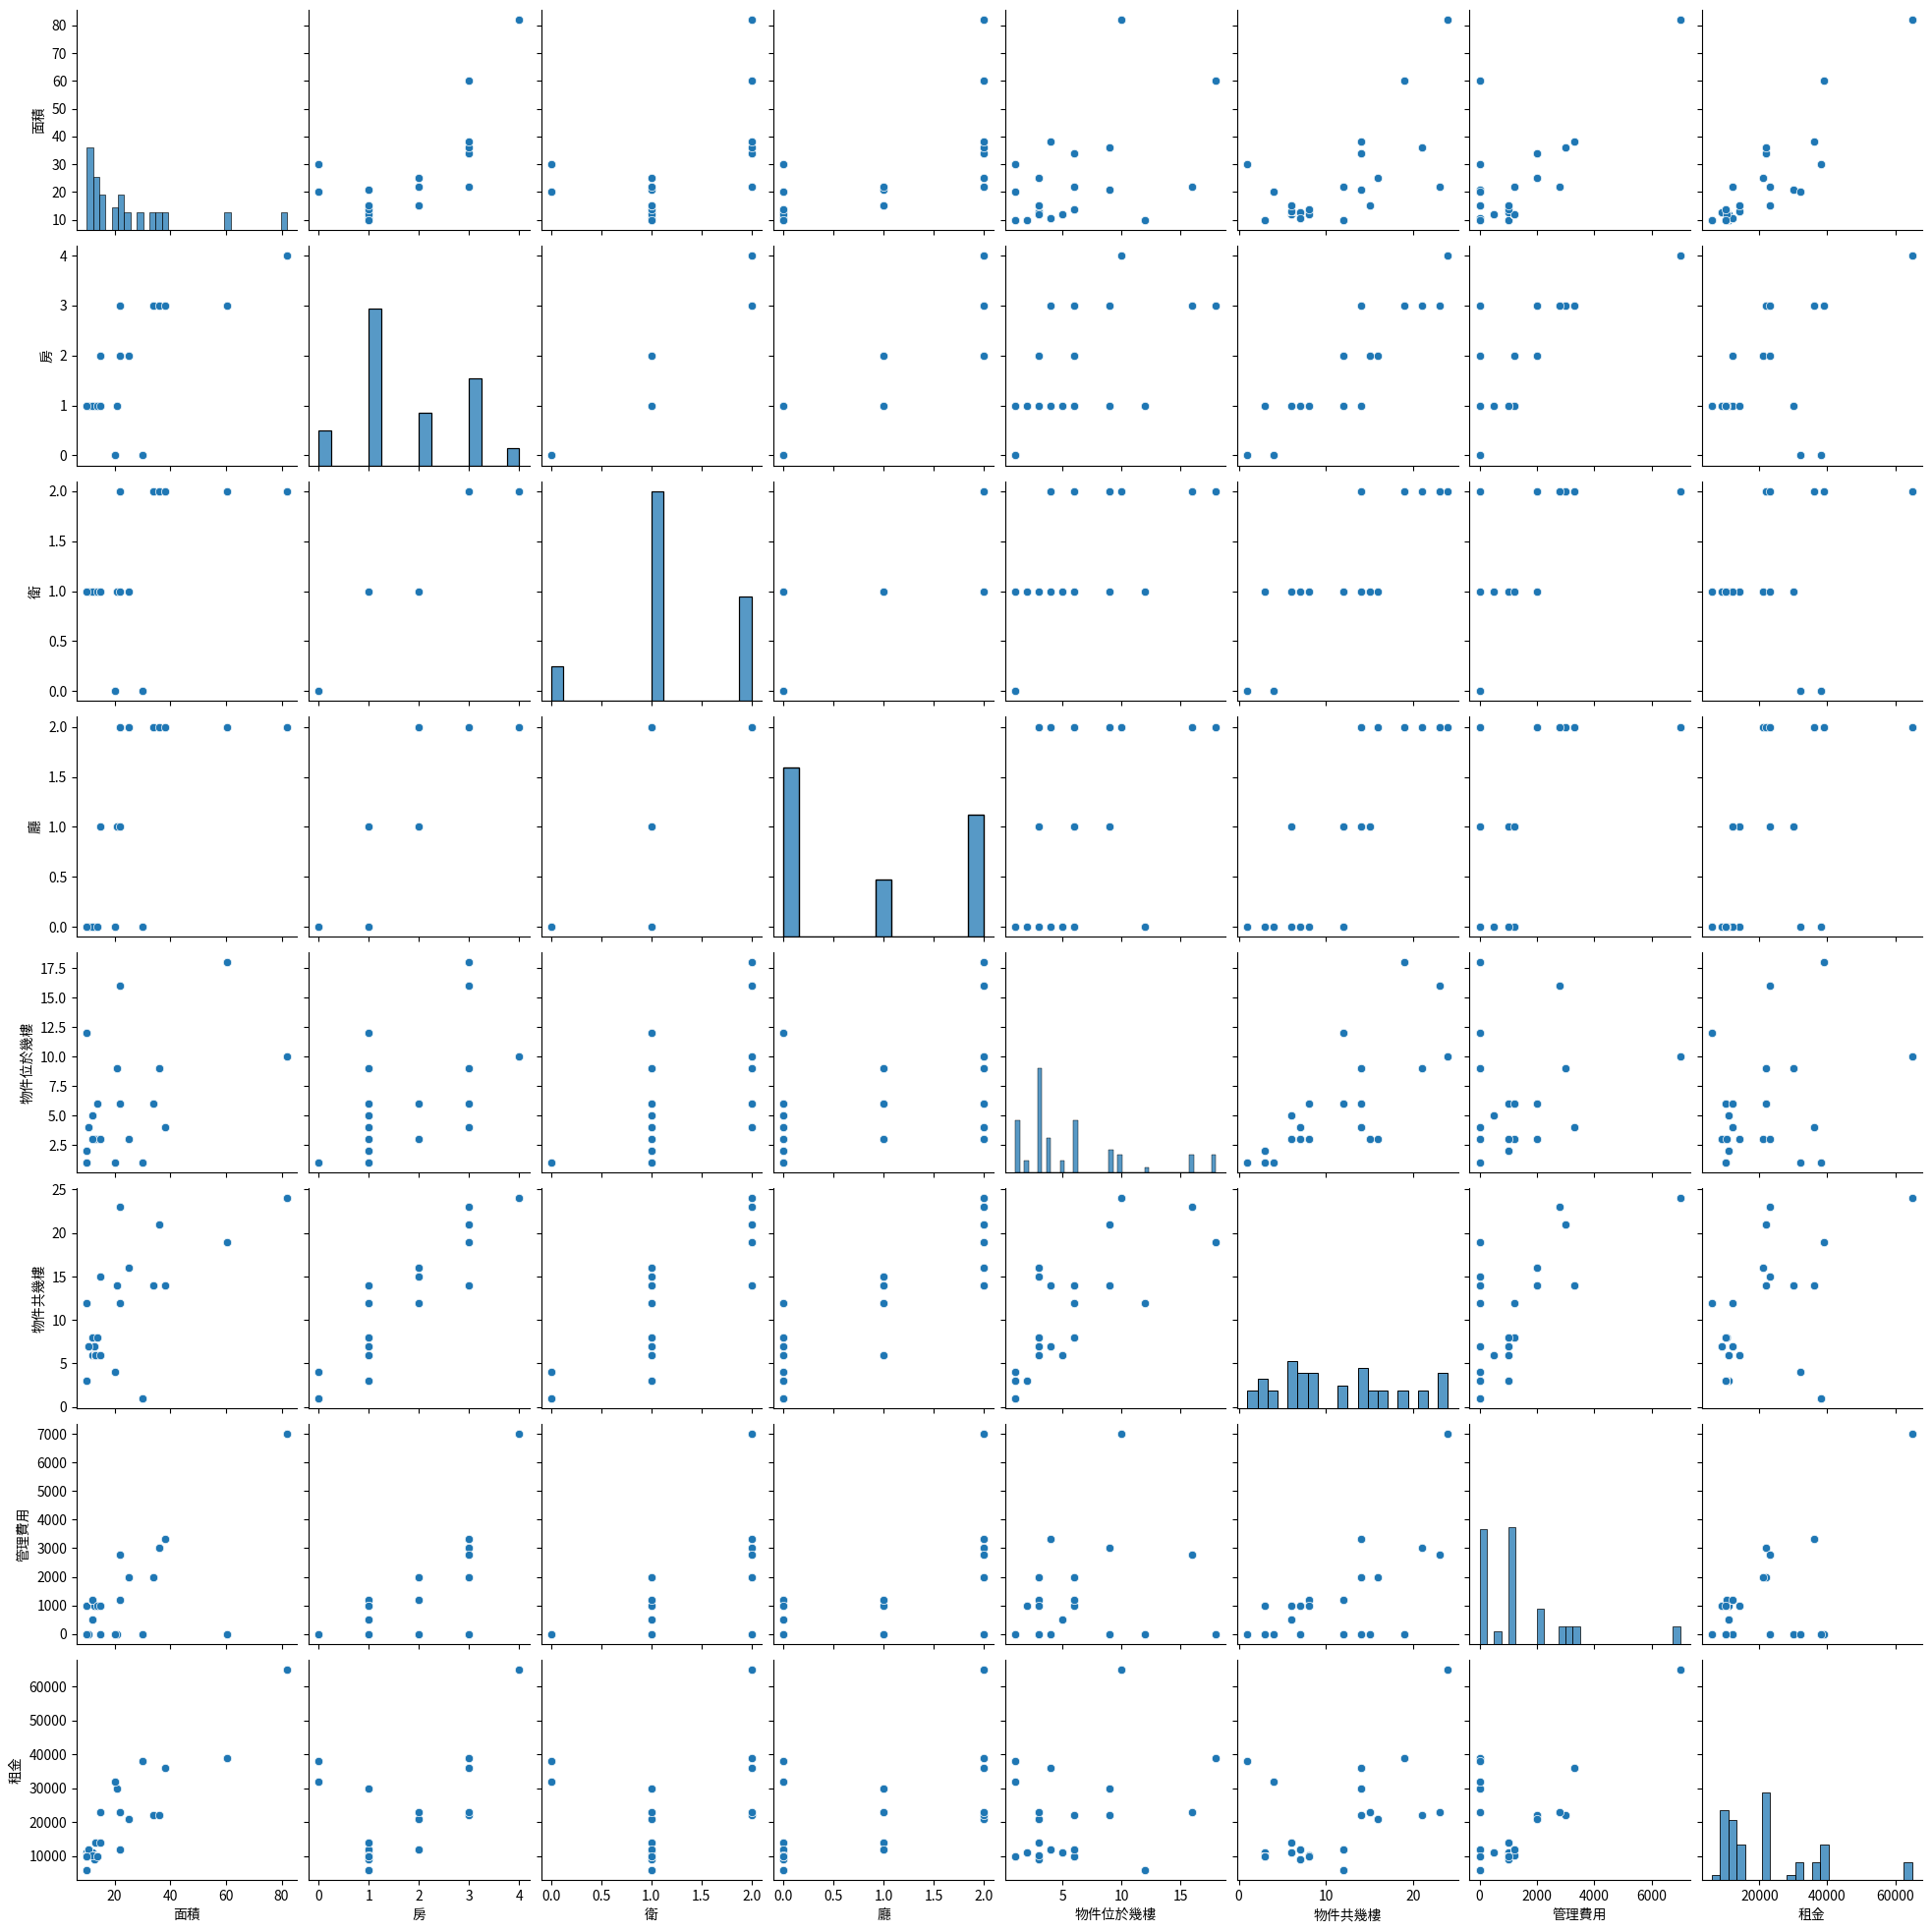

In [1567]:
sns.pairplot(data=data)

In [1568]:
rem={'住宅':0,'店面':1,'整層住家':2,'獨立套房':3,'辦公':4}
# rem['住宅']
data['物件類型']=LabelEncoder().fit_transform(data['物件類型'])
test_data['物件類型']=LabelEncoder().fit_transform(test_data['物件類型'])
data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   面積      3980 non-null   float64
 1   房       3980 non-null   int64  
 2   衛       3980 non-null   int64  
 3   廳       3980 non-null   int64  
 4   物件類型    3980 non-null   int32  
 5   物件位於幾樓  3980 non-null   int64  
 6   物件共幾樓   3980 non-null   int64  
 7   管理費用    3980 non-null   int64  
 8   租金      3980 non-null   int64  
dtypes: float64(1), int32(1), int64(7)
memory usage: 264.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   面積      3200 non-null   float64
 1   房       3200 non-null   float64
 2   衛       3200 non-null   float64
 3   廳       3200 non-null   float64
 4   物件類型    3200 non-null   int32  
 5   物件位於幾樓  3200 non-null   int64  
 6   物件共幾樓   3200 non-n

## 樂屋網西屯租屋

In [1569]:
Luwu=pd.read_csv("LuwuRent.csv",index_col=False)
Luwu

,Unnamed: 0,住址,物件說明,面積,房,衛,廳,物件類型,樓層,租金
0,0,台中市西屯區精誠路,✓全新一層兩戶✓陽台獨洗+流理臺✓室內機車位✓,13.6坪,1,1.0,NaN,獨立套房/透天厝,3樓/5樓,"11,999元"
1,1,台中市西屯區國安二路,百萬裝潢飯店套房⭐車位可租⭐可租補戶籍⭐1月中可住,14.23坪,1,1.0,NaN,獨立套房/電梯大廈,7樓/9樓,"14,499元"
2,2,台中市西屯區福星路,時尚裝潢⭐陽台獨曬⭐有電梯⭐逢甲僑光,9坪,1,1.0,NaN,獨立套房/電梯大廈,4樓/9樓,"6,499元"
3,3,台中市西屯區文華路正煌巷,文華路✨獨洗陽台✨可無聲寵物✨台水電✨子母車,13坪,1,1.0,NaN,獨立套房/電梯大廈,6樓/8樓,"8,999元"
4,4,台中市西屯區文華路正煌巷,秒殺台水電可寵✅近逢甲電梯✅陽台獨洗✅,12坪,-,NaN,NaN,獨立套房/電梯大廈,6樓/8樓,"8,999元"
...,...,...,...,...,...,...,...,...,...,...
980,980,台中市西屯區長安路二段,水湳收租21間套房4間雅房透天,259坪,2,2.0,NaN,整層住家/透天厝,整棟/5樓,18萬
981,981,台中市西屯區工業區七路,台中工業區辦公室大空間180-260坪,180坪,-,NaN,NaN,住辦/辦公,1樓/2樓,15萬
982,982,台中市西屯區文心路三段,文心捷運質感美商辦,60.26坪,-,NaN,NaN,住辦/辦公,10樓/23樓,"49,800元"
983,983,台中市西屯區市政北七路,七期親家市政前棟商辦,63.42坪,-,NaN,NaN,住辦/辦公,11樓/28樓,"85,000元"


In [1570]:
Luwu=Luwu.drop(["住址","Unnamed: 0","物件說明"],axis=1)

#面積', '房', '衛', '廳','物件類型', '物件位於幾樓', '物件共幾樓', '管理費用','租金'
total_stair=[]
#租金
Luwu['租金'] =  Luwu['租金'].apply(lambda x : x.split('元')[0])
Luwu['租金'] =  Luwu['租金'].apply(lambda x : x.replace(',',''))
Luwu['租金'] =  Luwu['租金'].apply(lambda x : x.replace('.',''))
Luwu['租金'] =  Luwu['租金'].apply(lambda x : x.replace('萬','0000'))
Luwu['租金']=Luwu['租金'].astype(float)

#物件位於幾樓
stair=pd.Series(Luwu['樓層'].apply(lambda x : x.split('/')[1]))
stair= stair.apply(lambda x : x.split('樓')[0])
stair= stair.apply(lambda x : x.replace('-','0'))

#物件共幾樓
total_stair=pd.Series(Luwu['樓層'].apply(lambda x : x.split('/')[0]))
total_stair= total_stair.apply(lambda x : x.split('樓')[0])
total_stair= total_stair.apply(lambda x : x.replace('B1~1','1'))
total_stair= total_stair.apply(lambda x : x.replace('整棟','3'))
total_stair= total_stair.apply(lambda x : x.replace('頂','3'))
total_stair= total_stair.apply(lambda x : x.replace('B1~3','4'))
total_stair= total_stair.apply(lambda x : x.replace('-','0'))
total_stair= total_stair.apply(lambda x : x.replace('B1','1'))
total_stair= total_stair.apply(lambda x : x.replace('1~2','2'))
total_stair= total_stair.apply(lambda x : x.replace('1~4','4'))
total_stair= total_stair.apply(lambda x : x.replace('1~1','1'))
total_stair= total_stair.apply(lambda x : x.replace('1~B4','4'))
#物件類型
Luwu['物件類型'] =  Luwu['物件類型'].apply(lambda x : x.split('/')[0])

In [1571]:
#房
Luwu['房']=Luwu['房'].apply(lambda x:x.replace('-','0'))
Luwu['房']=Luwu['房'].astype(float)
#衛
Luwu['衛']=Luwu['衛'].astype(str)
for i in range(len(Luwu['衛'])):
    if Luwu.衛[i]=='nan':
        Luwu.衛[i]='0'
Luwu['衛']=Luwu['衛'].astype(float)
#廳
Luwu['廳']=Luwu['廳'].astype(str)
for i in range(len(Luwu['廳'])):
    if Luwu.廳[i]=='nan':
        Luwu.廳[i]='0'
Luwu['廳']=Luwu['廳'].astype(float)
# Luwu['廳']=Luwu['廳'].apply(lambda x : x.replace('','0'))

#面積
Luwu['面積'] =  Luwu['面積'].apply(lambda x : x.split('坪')[0])
Luwu['面積']=Luwu['面積'].astype(float)

Luwu=Luwu.drop('樓層',axis=1)
Luwu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   面積      985 non-null    float64
 1   房       985 non-null    float64
 2   衛       985 non-null    float64
 3   廳       985 non-null    float64
 4   物件類型    985 non-null    object 
 5   租金      985 non-null    float64
dtypes: float64(5), object(1)
memory usage: 46.3+ KB


C:\Users\richa\AppData\Local\Temp\ipykernel_55640\510199324.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Luwu.衛[i]='0'
C:\Users\richa\AppData\Local\Temp\ipykernel_55640\510199324.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Luwu.廳[i]='0'


In [1572]:
fee=[]
for i in range(985):
    fee.append(0)

In [1573]:
Luwu.insert(5,column="物件位於幾樓",value=stair)

In [1574]:
Luwu.insert(6,column="物件共幾樓",value=total_stair)

In [1575]:
Luwu.insert(7,column="管理費用",value=fee)

In [1576]:
Counter(Luwu['物件類型'])
# '住宅':0,'店面':1,'整層住家':2,'獨立套房':3,'辦公':4

Counter({'獨立套房': 510,
         '整層住家': 238,
         '店面': 117,
         '雅房': 2,
         '住辦': 23,
         '住宅': 34,
         '其他': 7,
         '分租套房': 15,
         '商用': 27,
         '土地': 7,
         '廠房': 5})

In [1577]:
skip=[]
for i in range(len(Luwu['面積'])):
    if Luwu.物件類型[i]=='獨立套房' or Luwu.物件類型[i]=='店面' or Luwu.物件類型[i]=='住宅' or Luwu.物件類型[i]=='整層住家':
        skip.append(i)
for i in range(len(Luwu['面積'])):
    if i not in skip:
        Luwu=Luwu.drop(index=i,axis=0)
Luwu=Luwu.reset_index(drop=True)
for i in range(len(Luwu['面積'])):
    if Luwu.房[i]==0:
        Luwu=Luwu.drop(index=i,axis=0)
Luwu=Luwu.reset_index(drop=True)
Counter(Luwu['物件類型'])

Counter({'獨立套房': 362, '整層住家': 231, '住宅': 33})

In [1578]:
Luwu['物件類型']=Luwu['物件類型'].map({'住宅':0,'店面':1,'整層住家':2,'獨立套房':3})
Luwu['物件位於幾樓']=Luwu['物件位於幾樓'].astype(float)
Luwu['物件共幾樓']=Luwu['物件共幾樓'].astype(float)

In [1579]:
Luwu_money=Luwu['租金']
Luwu=Luwu.drop('租金',axis=1)
Luwu

,面積,房,衛,廳,物件類型,物件位於幾樓,物件共幾樓,管理費用
0,13.60,1.0,1.0,0.0,3,5.0,3.0,0
1,14.23,1.0,1.0,0.0,3,9.0,7.0,0
2,9.00,1.0,1.0,0.0,3,9.0,4.0,0
3,13.00,1.0,1.0,0.0,3,8.0,6.0,0
4,14.00,1.0,1.0,0.0,3,8.0,6.0,0
...,...,...,...,...,...,...,...,...
621,6.38,1.0,1.0,0.0,2,12.0,7.0,0
622,61.75,6.0,4.0,2.0,2,4.0,2.0,0
623,106.17,1.0,4.0,2.0,2,4.0,4.0,0
624,259.00,2.0,2.0,0.0,2,5.0,3.0,0


# 隨機森林

In [1580]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
num_cols=['面積', '房', '衛', '廳','物件類型', '物件位於幾樓', '物件共幾樓', '管理費用']
y=data['租金']
# y
X_train,X_test,y_train,y_test = train_test_split(data[num_cols],y,test_size=0.25,random_state=42)
random_forest=RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train,y_train)
r_predicted=random_forest.predict(X_test)

importance=random_forest.feature_importances_
importance
# r_predicted

array([0.62927826, 0.09976646, 0.07568183, 0.0017707 , 0.01066154,
       0.00554351, 0.13841644, 0.03888125])

In [1581]:
y_test
y_test.values[0]

39000

### 租屋比價王:西屯 預測結果:mse 0,測試集全對?

In [1582]:
output={}
counter=0
for i in range(len(X_test)):
    output[y_test.index[i]]={"predict_value":r_predicted[i],"currect_value":y_test.values[i]}
output_csv=pd.DataFrame(output).T

# output_csv.to_csv("西屯預測結果.csv",index=False)
output_csv

,predict_value,currect_value
408,39000.0,39000.0
3322,13999.0,13999.0
682,22000.0,22000.0
3158,23000.0,23000.0
2356,23000.0,23000.0
...,...,...
3567,21000.0,21000.0
3340,6000.0,6000.0
1457,10000.0,10000.0
3054,23000.0,23000.0


In [1583]:
mean_squared_error(r_predicted,y_test)

0.0

### 租屋比價王:南屯 預測結果:mse 5E

In [1584]:
south_predicted=random_forest.predict(test_data)

In [1585]:

output={}
counter=0
for i in range(len(test_data)):
    output[i]={"predict_value":south_predicted[i],"currect_value":sout_rent_money[i]}
output_csv=pd.DataFrame(output).T

# output_csv.to_csv("西屯預測結果.csv",index=False)
output_csv

,predict_value,currect_value
0,11499.00,26000.0
1,21220.00,28000.0
2,10469.96,11500.0
3,8842.68,18000.0
4,43250.00,68000.0
...,...,...
3195,24949.95,7000.0
3196,21819.79,21000.0
3197,12722.01,29000.0
3198,21780.00,29999.0


In [1586]:
mean_squared_error(south_predicted,sout_rent_money)

502931782.345675

# 用Xgboost

In [1587]:
y=data['租金']
# y
X_train,X_test,y_train,y_test = train_test_split(data[num_cols],y,test_size=0.25,random_state=42)

In [1588]:
import xgboost as xgb

# 建立 XGBRegressor 模型
xgbrModel=xgb.XGBRegressor()
# 使用訓練資料訓練模型
xgbrModel.fit(X_train,y_train)
# 使用訓練資料預測
# predicted=xgbrModel.predict(test_data)
predicted=xgbrModel.predict(X_test)

X_test

,面積,房,衛,廳,物件類型,物件位於幾樓,物件共幾樓,管理費用
408,60.25,3,2,2,0,18,19,0
3322,13.00,1,1,0,3,3,6,1000
682,34.00,3,2,2,2,6,14,2000
3158,22.00,3,2,2,2,16,23,2791
2356,22.00,3,2,2,2,16,23,2791
...,...,...,...,...,...,...,...,...
3567,25.00,2,1,2,2,3,16,2000
3340,10.00,1,1,0,3,12,12,0
1457,10.00,1,1,0,3,1,3,0
3054,15.00,2,1,1,2,3,15,0


In [1589]:
importance=xgbrModel.feature_importances_
importance

array([3.2124889e-01, 4.3212640e-01, 0.0000000e+00, 0.0000000e+00,
       6.7613241e-03, 6.2861117e-03, 2.3357166e-01, 5.5868250e-06],
      dtype=float32)

In [1590]:
mean_squared_error(predicted,y_test)

4.794010564909508e-06

In [1591]:
print(xgbrModel.score(X_test,y_test))

0.999999999999977


### 租屋比價王:西屯 預測結果:mse 0.0000047 ,測試集很接近

In [1592]:
output={}
counter=0
for i in range(len(X_test)):
    output[y_test.index[i]]={"predict_value":predicted[i],"currect_value":y_test.values[i]}
output_csv=pd.DataFrame(output).T

output_csv.to_csv("西屯預測結果.csv",index=False)
output_csv

,predict_value,currect_value
408,38999.996094,39000.0
3322,13998.999023,13999.0
682,21999.998047,22000.0
3158,22999.998047,23000.0
2356,22999.998047,23000.0
...,...,...
3567,20999.998047,21000.0
3340,6000.000488,6000.0
1457,10000.000977,10000.0
3054,22999.998047,23000.0


In [1593]:
mean_squared_error(predicted, y_test)

4.794010564909508e-06

### 租屋比價王:南屯 預測結果:mse 3E

In [1594]:
predicted=xgbrModel.predict(test_data)
mean_squared_error(predicted,sout_rent_money)

320882515.6540518

In [1595]:
output={}
for i in range(len(sout_rent_money)):
    output[i]={"predict_value":predicted[i],"currect_value":sout_rent_money[i]}
output_csv=pd.DataFrame(output).T

output_csv

,predict_value,currect_value
0,10034.710938,26000.0
1,21000.943359,28000.0
2,11012.825195,11500.0
3,10341.200195,18000.0
4,64999.996094,68000.0
...,...,...
3195,29921.509766,7000.0
3196,21987.640625,21000.0
3197,22000.265625,29000.0
3198,22024.919922,29999.0


## RandomForest 樂屋網:西屯 預測結果:mse

In [1596]:
X_train,X_test,y_train,y_test = train_test_split(data[['面積','物件類型']],y,test_size=0.25,random_state=42)
Luwu=Luwu.drop([ '房', '衛', '廳', '物件位於幾樓', '物件共幾樓', '管理費用'],axis=1)
Luwu

,面積,物件類型
0,13.60,3
1,14.23,3
2,9.00,3
3,13.00,3
4,14.00,3
...,...,...
621,6.38,2
622,61.75,2
623,106.17,2
624,259.00,2


In [1597]:
random_forest=RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train,y_train)
Luwu_predicted=random_forest.predict(Luwu)
mean_squared_error(Luwu_predicted,Luwu_money)

21814050744.097504

In [1598]:
output={}
for i in range(len(Luwu)):
    output[i]={"predict_value":Luwu_predicted[i],"currect_value":Luwu_money[i]}
output_csv=pd.DataFrame(output).T

output_csv.to_csv("樂屋西屯預測結果.csv",index=False)
output_csv

,predict_value,currect_value
0,9999.000000,11999.0
1,9999.000000,14499.0
2,9800.830039,6499.0
3,13999.000000,8999.0
4,9999.000000,8999.0
...,...,...
621,9800.830039,7800.0
622,37530.000000,29800.0
623,65000.000000,70000.0
624,65000.000000,180000.0


### Xgboost 樂屋網:西屯 預測結果:mse 

In [1599]:
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(X_train,y_train)
predicted=xgbrModel.predict(Luwu)

importance=xgbrModel.feature_importances_
importance

array([0.7226083 , 0.27739164], dtype=float32)

In [1600]:
mean_squared_error(predicted,Luwu_money)

21835505751.240295

In [1601]:
output={}
for i in range(len(Luwu)):
    output[i]={"predict_value":predicted[i],"currect_value":Luwu_money[i]}
outpuat_csv=pd.DataFrame(output).T

output_csv.to_csv("樂屋西屯預測結果.csv",index=False)
output_csv

,predict_value,currect_value
0,9999.000000,11999.0
1,9999.000000,14499.0
2,9800.830039,6499.0
3,13999.000000,8999.0
4,9999.000000,8999.0
...,...,...
621,9800.830039,7800.0
622,37530.000000,29800.0
623,65000.000000,70000.0
624,65000.000000,180000.0
